In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as smt

from statsmodels.discrete.discrete_model import Logit
from scipy.special import logit

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.svm import SVC

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Please modify the file path to where the Shared Folder "Statistics_groupproject" located on your Google Drive. The following file path only works for ECHO.
#file_path = "/content/drive/MyDrive/Data Science/2-Statistics for Data Science/Statistics_groupproject/"
#file_path = "D:\\Resources\\Training\\DS_StatisticsCourse\\Group Assignment\\3rd_Iteration_Apr8th\Statistics_groupproject\\"
file_path = "/content/drive/MyDrive/Colab Notebooks/Statistics_groupproject/" #Fan's file path
stroke_OHencoded='stroke_data_OHencoded.csv'

# <font color=blue>Import Data</font>

In [ ]:
#HH - Read file without Google Drive
#stroke_encoded=pd.read_csv(stroke_OHencoded) #import data

#HH - Read file using Google Drive
stroke_encoded=pd.read_csv(file_path+stroke_OHencoded) #import data

In [ ]:
stroke_encoded

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,1,67.0,0,1,1,0,228.69,36.6,1,0,0,1,0,0,1,0,0
1,0,61.0,0,0,1,1,202.21,28.1,1,0,0,0,1,0,0,1,0
2,1,80.0,0,1,1,1,105.92,32.5,1,0,0,1,0,0,0,1,0
3,0,49.0,0,0,1,0,171.23,34.4,1,0,0,1,0,0,0,0,1
4,0,79.0,1,0,1,1,174.12,24.0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,80.0,1,0,1,0,83.75,28.1,0,0,0,1,0,0,0,1,0
5105,0,81.0,0,0,1,0,125.20,40.0,0,0,0,0,1,0,0,1,0
5106,0,35.0,0,0,1,1,82.99,30.6,0,0,0,0,1,0,0,1,0
5107,1,51.0,0,0,1,1,166.29,25.6,0,0,0,1,0,0,1,0,0


In [ ]:
stroke_encoded['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

- Based on the value counts the data is unbalanced

In [ ]:
#split data into predictors and response
x = stroke_encoded.drop('stroke', axis=1)
y=stroke_encoded.stroke

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   Residence_type     5109 non-null   int64  
 6   avg_glucose_level  5109 non-null   float64
 7   bmi                5109 non-null   float64
 8   Govt_job           5109 non-null   int64  
 9   Never_worked       5109 non-null   int64  
 10  Private            5109 non-null   int64  
 11  Self-employed      5109 non-null   int64  
 12  children           5109 non-null   int64  
 13  formerly smoked    5109 non-null   int64  
 14  never smoked       5109 non-null   int64  
 15  smokes             5109 non-null   int64  
dtypes: float64(3), int64(13)

In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5104    0
5105    0
5106    0
5107    0
5108    0
Name: stroke, Length: 5109, dtype: int64

# <font color = blue>Preparing the Train and Test Data - Original Data</font>

In [ ]:
#Split the data. 70% of original data is used for training and the rest 30% is used for test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
y_train.value_counts() #check the number of training data

0    3416
1     160
Name: stroke, dtype: int64

In [ ]:
y_test.value_counts() # check the number of test data

0    1444
1      89
Name: stroke, dtype: int64

This data is unbalanced. We need to reduce the oversampled class (0) or inflate  the undersampled class(1). 

To reduce an oversampled class, it is recommended to select that class into a separate dataframe, shuffle the rows and select each n-th row from dataframe; number n is chosen so that two datasets - positive and negative classes - will have comparible sizes.

To inflate the undersampled class, duplicate the undersampled class so that the final dataset has an approximetely equal number of positive and negative instances. Again, the recipe would be to separate into two datasets by the class, duplicate the rows of the undersampled class as many times as required, and then combine the datasets.

Or we can use SMOTE to balance data.

# <font color=blue>Resample the training data in order to Balance the data </font>

In [ ]:
# Use SMOTE to resample the training data
from imblearn.over_sampling import SMOTE
smote=SMOTE()

x_res, y_res = smote.fit_resample(x_train,y_train)

In [ ]:
y_res.value_counts() #now the data is balanced 

0    3416
1    3416
Name: stroke, dtype: int64

In [ ]:
#merge the predictors and response of the resampled data
stroke_res=x_res.copy() #HH - stroke_res data frame is the resampled data frame
stroke_res['stroke']=y_res
stroke_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6832 entries, 0 to 6831
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             6832 non-null   int64  
 1   age                6832 non-null   float64
 2   hypertension       6832 non-null   int64  
 3   heart_disease      6832 non-null   int64  
 4   ever_married       6832 non-null   int64  
 5   Residence_type     6832 non-null   int64  
 6   avg_glucose_level  6832 non-null   float64
 7   bmi                6832 non-null   float64
 8   Govt_job           6832 non-null   int64  
 9   Never_worked       6832 non-null   int64  
 10  Private            6832 non-null   int64  
 11  Self-employed      6832 non-null   int64  
 12  children           6832 non-null   int64  
 13  formerly smoked    6832 non-null   int64  
 14  never smoked       6832 non-null   int64  
 15  smokes             6832 non-null   int64  
 16  stroke             6832 

# Define a Function to Test the Model and Calculate the Following Measures:
*   Statistical Accuracy (ACC)
*   Matthews Correlation Coefficient (MCC)
*   Precision
*   Rrecall
*   Specificity
*   F1-score













In [ ]:
# Define a funtion to predict the test data using the trained logistic regression model
# return a confusion matrix for comparison and calculation of matrics
def prediction(m_fit, predictors, thr=0.5):
  
  # Predic the test data
  y_pred=m_fit.predict(x_test[predictors])
  y_pred=(y_pred[:]>=thr)*1

  # Merge the true values and the predicted values in the test data
  m_val=y_pred.to_frame().join(y_test.to_frame())
  m_val.rename(columns={0: "prediction", "stroke": "real"}, inplace=True)

  ct= pd.crosstab(m_val['real'],m_val['prediction'])

  if len(ct.columns)==1: # Check if there is only one prediction
    if ct.columns==0:    # if the only prediction is 0
      ct[1]=0            # fill the prediction of 1 with 0
    else:                # if the only prediction is 1 (not 0)
      ct[0]=0            # fill the prediction of 0 with 0

  ct= ct.reindex(sorted(ct.columns),axis=1)

  

  return ct





# Define a function to calculate logistical regression module measures
# Calculate Accuracy, Precision, Recall, Specificity and F1-score
def cal_metrics(m_fit, predictors, thr=0.5):

  conf_mat= (prediction(m_fit, predictors, thr)).to_numpy()
  # Extract TN, FP, ...
  tn, fp, fn, tp = conf_mat.flatten()
 
  #calculate matrics
  acc = (tp + tn) / np.sum(conf_mat)
  mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
  prc = tp / (tp + fp)
  rec = tp / (tp + fn)
  spec = (1. * tn) / (tn + fp)
  f1_score = 2* (prc * rec)/(prc + rec)

  print('Accuracy:', acc)
  print('Matthews:', mcc)
  print('Precision', prc)
  print('Recall:', rec)
  print('Specificity:', spec)
  print('F1_score:', f1_score)

  return acc, mcc, prc, rec, spec, f1_score

# Define a Function Area Under ROC Curver (AUROC) Calculation

In [ ]:
# Define a fuction to calculate Area Under ROC Curve (AUROC)
def cal_auroc(m_fit, predictors):

  # Set discrimination thresholds
  ths = np.arange(0., 1., 0.025)

  # Containers
  sensitivity = []
  specificity = []
  accuracy = []
  matthews = []

  # Main loop
  for th in ths:
    # Generate estimates
    
    conf_mat= (prediction(m_fit, predictors, thr=th)).to_numpy()
    
    # Extract TN, FP, ...
    tn, fp, fn, tp = conf_mat.flatten()

    # Calculate sensitivity and specificity
    sens = (1. * tp) / (tp + fn)
    spec = (1. * tn) / (tn + fp)  

    # Calculate ACC and MCC
    acc = (tp + tn) / np.sum(conf_mat)
    mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))

    # Calculate AUROC
    # Add to containers
    sensitivity.append(sens)
    specificity.append(spec)
    accuracy.append(acc)
    matthews.append(mcc)

  # Bind all the numbers together
  roc = pd.DataFrame({'discret_thr' : ths, 
                      'sensitivity' : sensitivity, 
                      'specificity' : specificity,
                      '_specificity' : [1 - x for x in specificity],
                      'accuracy' : accuracy, 
                      'matthews' : matthews})

  # Sort by 1 - specificity so we can plot it easily
  roc = roc.sort_values(by = "_specificity")
  auc = np.trapz(y = roc.sensitivity, x = roc._specificity)
  print ("Area under ROC curve = %1.2f" % auc)
  
  #plot ROC curve
  if m_fit==m2_fit:
    model_name='Non Balanced'
  elif m_fit==m3_fit:
    model_name='Balanced'
  else:
    pass

  plt.subplots(1, figsize=(8,8))
  plt.plot(roc._specificity, roc.sensitivity, label = 'ROC')
  plt.plot([0, 1], ls="--")
  plt.title('Receiver Operating Characteristic (ROC) - '+model_name, fontsize=16)
  plt.ylabel('True Positive Rate',fontsize=16)
  plt.xlabel('False Positive Rate',fontsize=16)
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=16)

  plt.show()

  return auc

# <font color=blue>Logistic Regression Model on Original (Non Balanced) Data (stroke_encoded)</font>
**Now we are using the logistic regression models from Statsmodels library to train the data.**

In [ ]:
# check logistic regression model with unbalanced (original) data.
#'never_worked' and 'smokes' are removed to optimize the fitting
predictors2 = ['gender', 
              'age',
              'hypertension',
              'heart_disease',
              'ever_married',
              'Residence_type',
              'avg_glucose_level',
              'bmi',
              'Govt_job',
              #'Never_worked',
              'Private',
              'Self-employed',
              'children',
              'formerly smoked',
              'never smoked',
              #'smokes'
              ]
m2 = Logit(stroke_encoded['stroke'], stroke_encoded[predictors2])
m2_fit = m2.fit()

Optimization terminated successfully.
         Current function value: 0.158944
         Iterations 10


### <font color = blue>Model Summary for the Original (Non Balanced Data) - m2 is the model and stroke_encoded is data frame</font>

In [ ]:
print(m2_fit.summary2()) 

                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.184     
Dependent Variable:  stroke           AIC:              1652.0916 
Date:                2022-04-14 05:30 BIC:              1743.6342 
No. Observations:    5109             Log-Likelihood:   -812.05   
Df Model:            13               LL-Null:          -995.14   
Df Residuals:        5095             LLR p-value:      3.0437e-70
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      10.0000                                      
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
gender            -0.0981   0.1393  -0.7041 0.4813 -0.3712  0.1750
age                0.0688   0.0055  12.4760 0.0000  0.0580  0.0796
hypertension       0.4818   0.1636   2.9447 0.0032  0.1611  0.8024
heart_disease      0.

In [ ]:
prediction(m2_fit, predictors2)

prediction,0,1
real,,
0,1443,1
1,88,1


# <font color=blue>Calculate Accuracy, F1 Score, Recall, Precision and MCC for Original (Non Balanced Data - m2)</font>

Accuracy: 0.9419439008480104
Matthews: 0.06830588177236914
Precision 0.5
Recall: 0.011235955056179775
Specificity: 0.9993074792243767
F1_score: 0.021978021978021976


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


Area under ROC curve = 0.81


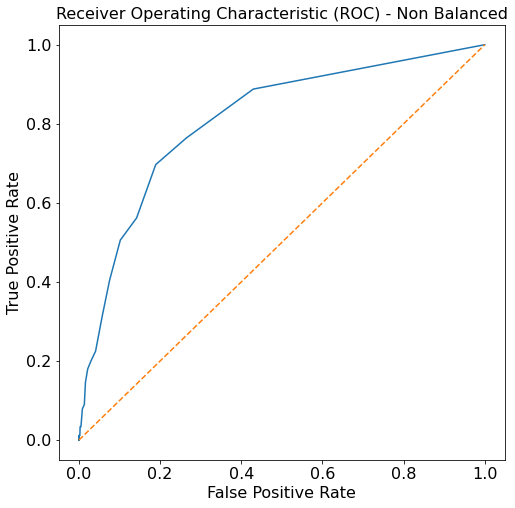

In [ ]:
# Call functions to retrive value for each metrics
acc, mcc, prc, rec,spec,f1_score=cal_metrics(m2_fit, predictors2)
auc=cal_auroc(m2_fit, predictors2)

In [ ]:
table_index=["Accuracy","MCC","Precision","Recall","Specificity","F1-Score","AUROC"]
table_index

['Accuracy', 'MCC', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'AUROC']

In [ ]:
# Store the analysis result into an array
m2_AnalysisParmaters=[acc, mcc, prc, rec,spec,f1_score,auc]
m2_AnalysisParmaters

[0.9419439008480104,
 0.06830588177236914,
 0.5,
 0.011235955056179775,
 0.9993074792243767,
 0.021978021978021976,
 0.8096968470851877]

In [ ]:
# Creating data frame to store all analysis parameters
analysisResults = pd.DataFrame(table_index, columns=['Type'])
analysisResults["Non Balanced"]=m2_AnalysisParmaters
analysisResults

,Type,Non Balanced
0,Accuracy,0.941944
1,MCC,0.068306
2,Precision,0.500000
3,Recall,0.011236
4,Specificity,0.999307
5,F1-Score,0.021978
6,AUROC,0.809697


# <font color=blue>Logistic Regression Model on Resample (Balanced - m3) Data (stroke_res)</font>

In [ ]:
#When using original unbalanced data for training and prediction, the pseudo R-squared number is low.
#Then we are going to test resampled data

In [ ]:
#remove the predictors of 'never worked' and 'smokes' in resampled data
predictors3 = ['gender', 
              'age',
              'hypertension',
              'heart_disease',
              'ever_married',
              'Residence_type',
              'avg_glucose_level',
              'bmi',
              'Govt_job',
              #'Never_worked',
              'Private',
              'Self-employed',
              'children',
              'formerly smoked',
              'never smoked',
              #'smokes'
              ]
m3 = Logit(stroke_res['stroke'], stroke_res[predictors3]) #HH - stroke_res is the resampled data frame
m3_fit = m3.fit() #HH - m3 is the model on the resample data

Optimization terminated successfully.
         Current function value: 0.241275
         Iterations 9


### <font color = blue>Model Summary for the Resampled (Balanced Data) - m3 is the model and stroke_res is data frame</font>

In [ ]:
print(m3_fit.summary2())

                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.652    
Dependent Variable:   stroke           AIC:              3324.7810
Date:                 2022-04-14 05:31 BIC:              3420.3922
No. Observations:     6832             Log-Likelihood:   -1648.4  
Df Model:             13               LL-Null:          -4735.6  
Df Residuals:         6818             LLR p-value:      0.0000   
Converged:            1.0000           Scale:            1.0000   
No. Iterations:       9.0000                                      
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
gender            -0.6499   0.0948  -6.8542 0.0000 -0.8357 -0.4640
age                0.1152   0.0037  31.2047 0.0000  0.1079  0.1224
hypertension      -0.5329   0.1372  -3.8856 0.0001 -0.8018 -0.2641
heart_disease     -1.

In [ ]:
stroke_res.loc[:, 'p'] = m3_fit.predict(stroke_res[predictors3])

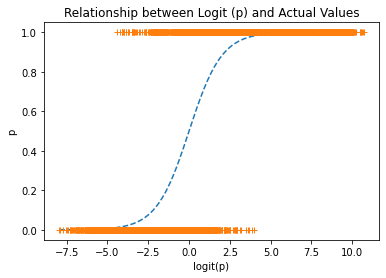

In [ ]:
# Plotting the relationship between the values of Logit (p) and the odds p along with the actual values of the response (stroke)
plt.title('Relationship between Logit (p) and Actual Values') #Apr 12th - HH Added Title
stroke_res = stroke_res.sort_values(by = ['p'], axis = 0)
plt.plot(logit(stroke_res.p), stroke_res.p, '--')
plt.plot(logit(stroke_res.p), stroke_res.stroke, '+')
plt.xlabel('logit(p)')
plt.ylabel('p')

plt.savefig(file_path+"images/LogitRelationship-Echo testing.jpg", dpi = 300) #Apr 12th - HH Added Export to go into Report
plt.show()

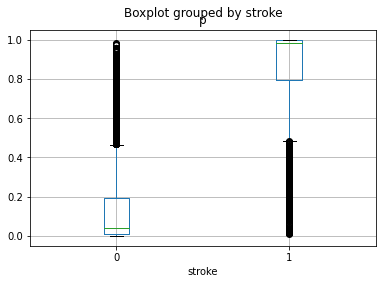

In [ ]:
#Plotting a boxplot to see the distribution of the estimated odds for both values of the actual response.
stroke_res.boxplot(column='p', by = 'stroke')

plt.savefig(file_path+"images/boxplot_groupedByStroke.jpg", dpi = 300) #Apr 12th - HH Added Export to go into Report
plt.show()

In [ ]:
prediction(m3_fit, predictors3, thr=0.5) # predict the test data with the discrimination threshold of 0.5

prediction,0,1
real,,
0,1308,136
1,64,25


In [ ]:
prediction(m3_fit, predictors3, thr=0.4) # predict the test data with the discrimination threshold of 0.4

prediction,0,1
real,,
0,1265,179
1,56,33


In [ ]:
prediction(m3_fit, predictors3, thr=0.6) # predict the test data with the discrimination threshold of 0.6

prediction,0,1
real,,
0,1345,99
1,71,18


# <font color=blue>Calculate Accuracy, F1 Score, Recall, Precision and MCC for Resampled (Balanced Data - m3)</font>

Accuracy: 0.8695368558382257
Matthews: 0.14241976329438824
Precision 0.15527950310559005
Recall: 0.2808988764044944
Specificity: 0.9058171745152355
F1_score: 0.2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


Area under ROC curve = 0.77


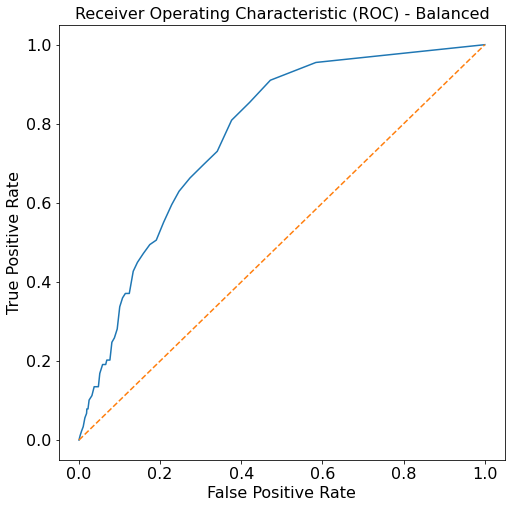

In [ ]:
# We can calculate accuracy, F1 score, precision, recall and MCC as well and compare them with the scores of original unbalanced data.
# Call functions to retrive value for each metrics
acc, mcc, prc, rec,spec,f1_score=cal_metrics(m3_fit, predictors3, thr=0.5)
auc=cal_auroc(m3_fit, predictors3)

In [ ]:
# Store the analysis result into an array
m3_thr5_AnalysisParmaters=[acc, mcc, prc, rec,spec,f1_score,auc]
m3_thr5_AnalysisParmaters

[0.8695368558382257,
 0.14241976329438824,
 0.15527950310559005,
 0.2808988764044944,
 0.9058171745152355,
 0.2,
 0.7720711817983752]

In [ ]:
# Add analysis premeters to the result data frame
analysisResults["Balanced (threshold=0.5)"]=m3_thr5_AnalysisParmaters
analysisResults

,Type,Non Balanced,Balanced (threshold=0.5)
0,Accuracy,0.941944,0.869537
1,MCC,0.068306,0.142420
2,Precision,0.500000,0.155280
3,Recall,0.011236,0.280899
4,Specificity,0.999307,0.905817
5,F1-Score,0.021978,0.200000
6,AUROC,0.809697,0.772071


Accuracy: 0.8467058056099152
Matthews: 0.16720487315597235
Precision 0.15566037735849056
Recall: 0.3707865168539326
Specificity: 0.8760387811634349
F1_score: 0.21926910299003322


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


Area under ROC curve = 0.77


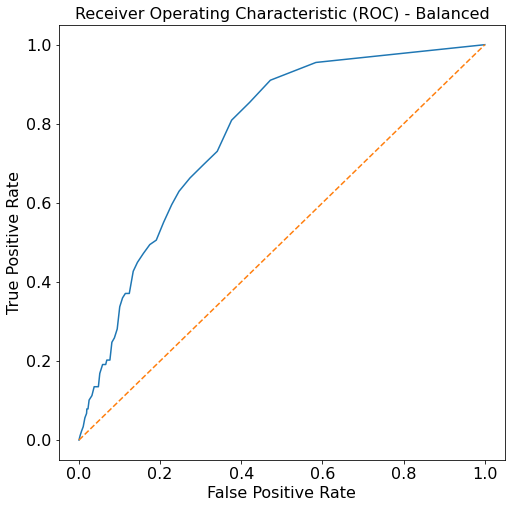

In [ ]:
# Call functions to retrive value for each metrics with threshold of 0.4
acc, mcc, prc, rec,spec,f1_score=cal_metrics(m3_fit, predictors3, thr=0.4)
auc=cal_auroc(m3_fit, predictors3)

In [ ]:
# Store the analysis result into an array (threshold =0.4)
m3_thr4_AnalysisParmaters=[acc, mcc, prc, rec,spec,f1_score,auc]
m3_thr4_AnalysisParmaters

[0.8467058056099152,
 0.16720487315597235,
 0.15566037735849056,
 0.3707865168539326,
 0.8760387811634349,
 0.21926910299003322,
 0.7720711817983752]

In [ ]:
# Add analysis premeters to the result data frame (threshold=0.4)
analysisResults["Balanced (threshold=0.4)"]=m3_thr4_AnalysisParmaters
analysisResults

,Type,Non Balanced,Balanced (threshold=0.5),Balanced (threshold=0.4)
0,Accuracy,0.941944,0.869537,0.846706
1,MCC,0.068306,0.142420,0.167205
2,Precision,0.500000,0.155280,0.155660
3,Recall,0.011236,0.280899,0.370787
4,Specificity,0.999307,0.905817,0.876039
5,F1-Score,0.021978,0.200000,0.219269
6,AUROC,0.809697,0.772071,0.772071


# <font color=blue>Compare Various Models using sklearn library</font>

### **Create and Test various Models from sklearn library **





## Define fuctions for measures, comparison and ROC chart based on the model selection
       - generate 7 measures
       - comparison between the predicted and real stroke data
       - generate ROC chart

In [ ]:
def result(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  mcc = matthews_corrcoef(y_true,y_pred)
  prc = precision_score(y_true, y_pred)
  rec = recall_score(y_true, y_pred)
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  spec = tn / (tn + fp)
  f1_s = smt.f1_score(y_true, y_pred)
  auc = roc_auc_score(y_true, y_pred)

  return acc, mcc, prc, rec, spec, f1_s, auc

def comparision(y_true):
  # Compare the predicted stroke data with the real data
  pred=pd.DataFrame(y_test)
  pred['stroke_pred']=y_true.tolist()
  pred.rename(columns={"stroke_pred": "prediction", "stroke": "real"}, inplace=True)
  # Create a confusion matrix
  return pd.crosstab(pred['real'],pred['prediction'])

def chart(model_name,y_true,y_pred):
  #plot Receiver Operating Characteristic (ROC) curve
  fpr, tpr, thresholds = roc_curve(y_true, y_pred)
  plt.subplots(1, figsize=(8,8))
  plt.title('Receiver Operating Characteristic (ROC) - '+model_name, fontsize=16)
  plt.plot(fpr, tpr)
  plt.plot([0, 1], ls="--")
  plt.ylabel('True Positive Rate',fontsize=16)
  plt.xlabel('False Positive Rate',fontsize=16)
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=16)

  plt.show()

# Models

## <font color=blue> Logistic Regression</font>

In [ ]:
# Use resampled data and optimized predictors to train and test the logistic regression model from sklearn libary. 
model_name="Logistic Regression"
logistic= LogisticRegression(C=1e9, max_iter=1000)
logistic.fit(x_res[predictors3], y_res)
y_logit = logistic.predict(x_test[predictors3])

acc, mcc, prc, rec, spec, f1_s, auc = result(y_test, y_logit)

resampled_sklearnRegression=[acc,mcc,prc,rec,spec,f1_s,auc]
analysisResults['Balanced (SKLearn)'] = resampled_sklearnRegression
analysisResults

,Type,Non Balanced,Balanced (threshold=0.5),Balanced (threshold=0.4),Balanced (SKLearn)
0,Accuracy,0.941944,0.869537,0.846706,0.869537
1,MCC,0.068306,0.142420,0.167205,0.142420
2,Precision,0.500000,0.155280,0.155660,0.155280
3,Recall,0.011236,0.280899,0.370787,0.280899
4,Specificity,0.999307,0.905817,0.876039,0.905817
5,F1-Score,0.021978,0.200000,0.219269,0.200000
6,AUROC,0.809697,0.772071,0.772071,0.593358


In [ ]:
comparision(y_logit)

prediction,0,1
real,,
0,1308,136
1,64,25


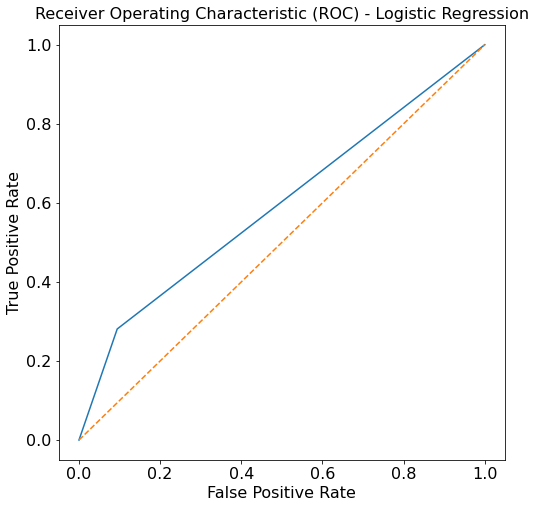

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot Receiver Operating Characteristic (ROC) curve
chart(model_name,y_test,y_logit)
plt.savefig("images\ROC- "+model_name+".jpg", dpi = 300)

## <font color=blue> Decision Tree Classifier</font>

In [ ]:
# Use resampled data and optimized predictors to train and test the decision tree classifier model.
model_name="Decision Tree Classfier"
decision = DecisionTreeClassifier()   
decision.fit(x_res[predictors3],y_res)
y_decision = decision.predict(x_test[predictors3])

acc, mcc, prc, rec, spec, f1_s,auc = result(y_test,y_decision)

resampled_sklearnRegression=[acc,mcc,prc,rec,spec,f1_s,auc]
analysisResults[model_name] = resampled_sklearnRegression
analysisResults

,Type,Non Balanced,Balanced (threshold=0.5),Balanced (threshold=0.4),Balanced (SKLearn),Decision Tree Classfier
0,Accuracy,0.941944,0.869537,0.846706,0.869537,0.895629
1,MCC,0.068306,0.142420,0.167205,0.142420,0.111649
2,Precision,0.500000,0.155280,0.155660,0.155280,0.155340
3,Recall,0.011236,0.280899,0.370787,0.280899,0.179775
4,Specificity,0.999307,0.905817,0.876039,0.905817,0.939751
5,F1-Score,0.021978,0.200000,0.219269,0.200000,0.166667
6,AUROC,0.809697,0.772071,0.772071,0.593358,0.559763


In [ ]:
comparision(y_decision)

prediction,0,1
real,,
0,1357,87
1,73,16


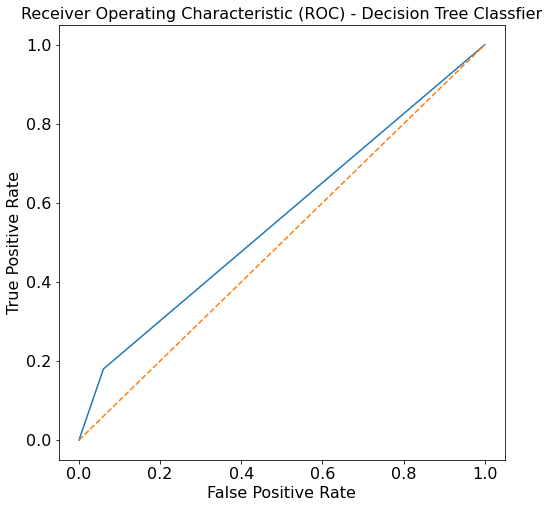

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot Receiver Operating Characteristic (ROC) curve
chart(model_name,y_test,y_decision)
plt.savefig("images\ROC- "+model_name+".jpg", dpi = 300)

## <font color=blue> Random Forest Classifier</font>

In [ ]:
# Use resampled data and optimized predictors to train and test the Random Forest classifier model 
forest = RandomForestClassifier()
forest.fit(x_res[predictors3], y_res)
y_forest = forest.predict(x_test[predictors3])
model_name="Random Forest Classifier"

acc, mcc, prc, rec, spec, f1_s,auc = result(y_test,y_forest)

resampled_sklearnRegression=[acc,mcc,prc,rec,spec,f1_s,auc]
analysisResults[model_name] = resampled_sklearnRegression
analysisResults

,Type,Non Balanced,Balanced (threshold=0.5),Balanced (threshold=0.4),Balanced (SKLearn),Decision Tree Classfier,Random Forest Classifier
0,Accuracy,0.941944,0.869537,0.846706,0.869537,0.895629,0.923679
1,MCC,0.068306,0.142420,0.167205,0.142420,0.111649,0.103489
2,Precision,0.500000,0.155280,0.155660,0.155280,0.155340,0.195652
3,Recall,0.011236,0.280899,0.370787,0.280899,0.179775,0.101124
4,Specificity,0.999307,0.905817,0.876039,0.905817,0.939751,0.974377
5,F1-Score,0.021978,0.200000,0.219269,0.200000,0.166667,0.133333
6,AUROC,0.809697,0.772071,0.772071,0.593358,0.559763,0.537750


In [ ]:
comparision(y_forest)

prediction,0,1
real,,
0,1407,37
1,80,9


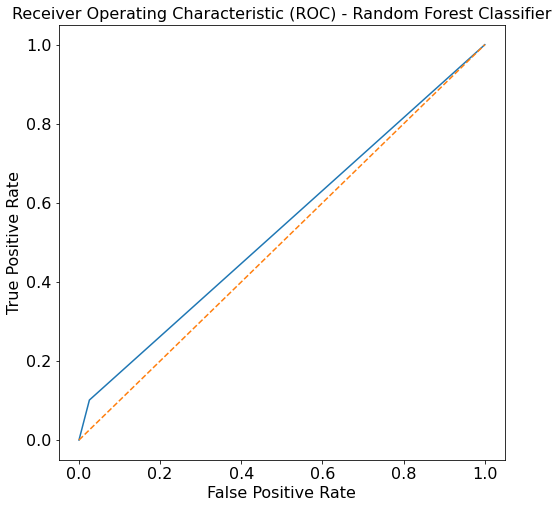

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot Receiver Operating Characteristic (ROC) curve
chart(model_name,y_test,y_forest)
plt.savefig("images\ROC- "+model_name+".jpg", dpi = 300)

## <font color=blue>Support Vector Machine Model</font>

In [ ]:
# Use resampled data and optimized predictors to train and test the Support Vector Machines model
model_name="Support Vector Machine"
svm=SVC()
svm.fit(x_res[predictors3], y_res)
y_svm = svm.predict(x_test[predictors3])

acc, mcc, prc, rec, spec, f1_s,auc = result(y_test,y_svm)

resampled_sklearnRegression=[acc,mcc,prc,rec,spec,f1_s,auc]
analysisResults[model_name] = resampled_sklearnRegression
analysisResults

,Type,Non Balanced,Balanced (threshold=0.5),Balanced (threshold=0.4),Balanced (SKLearn),Decision Tree Classfier,Random Forest Classifier,Support Vector Machine
0,Accuracy,0.941944,0.869537,0.846706,0.869537,0.895629,0.923679,0.712329
1,MCC,0.068306,0.142420,0.167205,0.142420,0.111649,0.103489,0.222402
2,Precision,0.500000,0.155280,0.155660,0.155280,0.155340,0.195652,0.134855
3,Recall,0.011236,0.280899,0.370787,0.280899,0.179775,0.101124,0.730337
4,Specificity,0.999307,0.905817,0.876039,0.905817,0.939751,0.974377,0.711219
5,F1-Score,0.021978,0.200000,0.219269,0.200000,0.166667,0.133333,0.227671
6,AUROC,0.809697,0.772071,0.772071,0.593358,0.559763,0.537750,0.720778


In [ ]:
comparision(y_svm)

prediction,0,1
real,,
0,1027,417
1,24,65


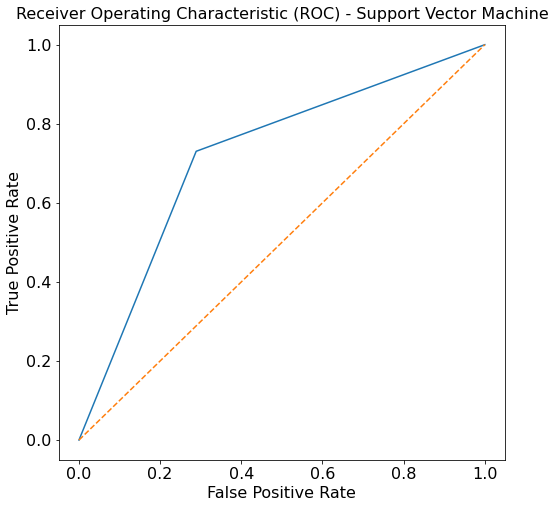

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot Receiver Operating Characteristic (ROC) curve
chart(model_name,y_test,y_svm)
plt.savefig("images\ROC- "+model_name+".jpg", dpi = 300)

The Support Vector Machine model could be improved by scaling the bmi, age and avg_glucose_level data prior to creating the model.  

## <font color=blue> AdaBoost Regression Model</font>

In [ ]:
# Use resampled data and optimized predictors to train and test the AdaBoost regression model
model_name ="Ada Boost Classifier"
boost=AdaBoostClassifier()
boost.fit(x_res[predictors3], y_res)
y_boost = boost.predict(x_test[predictors3])

acc, mcc, prc, rec, spec, f1_s,auc = result(y_test,y_boost)

resampled_sklearnRegression=[acc,mcc,prc,rec,spec,f1_s,auc]
analysisResults[model_name] = resampled_sklearnRegression
analysisResults

,Type,Non Balanced,Balanced (threshold=0.5),Balanced (threshold=0.4),Balanced (SKLearn),Decision Tree Classfier,Random Forest Classifier,Support Vector Machine,Ada Boost Classifier
0,Accuracy,0.941944,0.869537,0.846706,0.869537,0.895629,0.923679,0.712329,0.867580
1,MCC,0.068306,0.142420,0.167205,0.142420,0.111649,0.103489,0.222402,0.139694
2,Precision,0.500000,0.155280,0.155660,0.155280,0.155340,0.195652,0.134855,0.152439
3,Recall,0.011236,0.280899,0.370787,0.280899,0.179775,0.101124,0.730337,0.280899
4,Specificity,0.999307,0.905817,0.876039,0.905817,0.939751,0.974377,0.711219,0.903740
5,F1-Score,0.021978,0.200000,0.219269,0.200000,0.166667,0.133333,0.227671,0.197628
6,AUROC,0.809697,0.772071,0.772071,0.593358,0.559763,0.537750,0.720778,0.592319


In [ ]:
comparision(y_boost)

prediction,0,1
real,,
0,1305,139
1,64,25


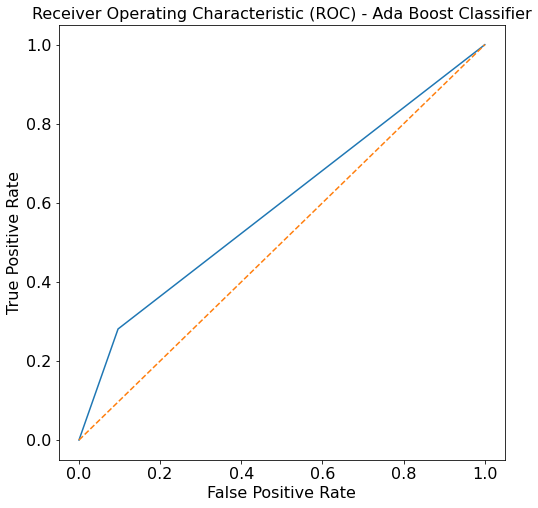

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot Receiver Operating Characteristic (ROC) curve
chart(model_name,y_test,y_boost)
plt.savefig("images\ROC- "+model_name+".jpg", dpi = 300)

## <font color=blue>K Neighbors Classifier </font>

In [ ]:
# Use resampled data and optimized predictors to train and test the K-nearest neighbor model
model_name = "KNeighbors"
KNN=KNeighborsClassifier()
KNN.fit(x_res[predictors3], y_res)
y_KNN = KNN.predict(x_test[predictors3])

acc, mcc, prc, rec, spec, f1_s,auc = result(y_test,y_KNN)

resampled_sklearnRegression=[acc,mcc,prc,rec,spec,f1_s,auc]
analysisResults[model_name] = resampled_sklearnRegression
analysisResults

,Type,Non Balanced,Balanced (threshold=0.5),Balanced (threshold=0.4),Balanced (SKLearn),Decision Tree Classfier,Random Forest Classifier,Support Vector Machine,Ada Boost Classifier,KNeighbors
0,Accuracy,0.941944,0.869537,0.846706,0.869537,0.895629,0.923679,0.712329,0.867580,0.800391
1,MCC,0.068306,0.142420,0.167205,0.142420,0.111649,0.103489,0.222402,0.139694,0.183718
2,Precision,0.500000,0.155280,0.155660,0.155280,0.155340,0.195652,0.134855,0.152439,0.144262
3,Recall,0.011236,0.280899,0.370787,0.280899,0.179775,0.101124,0.730337,0.280899,0.494382
4,Specificity,0.999307,0.905817,0.876039,0.905817,0.939751,0.974377,0.711219,0.903740,0.819252
5,F1-Score,0.021978,0.200000,0.219269,0.200000,0.166667,0.133333,0.227671,0.197628,0.223350
6,AUROC,0.809697,0.772071,0.772071,0.593358,0.559763,0.537750,0.720778,0.592319,0.656817


In [ ]:
comparision(y_KNN)

prediction,0,1
real,,
0,1183,261
1,45,44


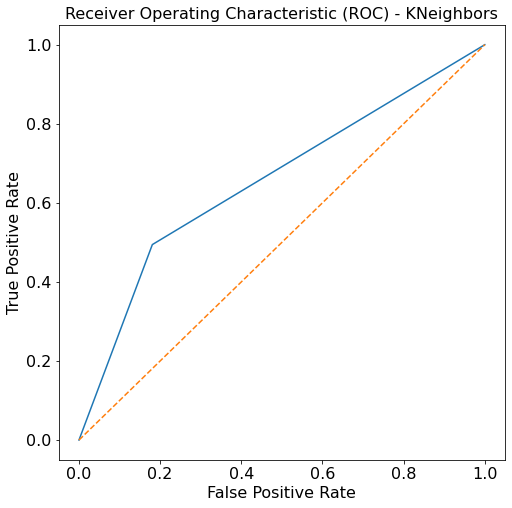

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot Receiver Operating Characteristic (ROC) curve
chart(model_name,y_test,y_KNN)
plt.savefig("images\ROC- "+model_name+".jpg", dpi = 300)

# <font color=blue>Analysis Charts</font>

In [ ]:
#Prepare the table for Visual Represetation
analysisResults=analysisResults.set_index(["Type"])
analysisResults2 = analysisResults.T
analysisResults2

Type,Accuracy,MCC,Precision,Recall,Specificity,F1-Score,AUROC
Non Balanced,0.941944,0.068306,0.500000,0.011236,0.999307,0.021978,0.809697
Balanced (threshold=0.5),0.869537,0.142420,0.155280,0.280899,0.905817,0.200000,0.772071
Balanced (threshold=0.4),0.846706,0.167205,0.155660,0.370787,0.876039,0.219269,0.772071
Balanced (SKLearn),0.869537,0.142420,0.155280,0.280899,0.905817,0.200000,0.593358
Decision Tree Classfier,0.895629,0.111649,0.155340,0.179775,0.939751,0.166667,0.559763
Random Forest Classifier,0.923679,0.103489,0.195652,0.101124,0.974377,0.133333,0.537750
Support Vector Machine,0.712329,0.222402,0.134855,0.730337,0.711219,0.227671,0.720778
Ada Boost Classifier,0.867580,0.139694,0.152439,0.280899,0.903740,0.197628,0.592319
KNeighbors,0.800391,0.183718,0.144262,0.494382,0.819252,0.223350,0.656817


In [ ]:
def analysisPlots(colName, color, title, filename):
    analysisResults2.plot(y = [colName], kind='bar', color = [color], width=.5, title = title)
    plt.savefig(file_path+filename, bbox_inches="tight")  
    #plt.savefig(filename, bbox_inches="tight")   
    plt.show()  

Accuracy


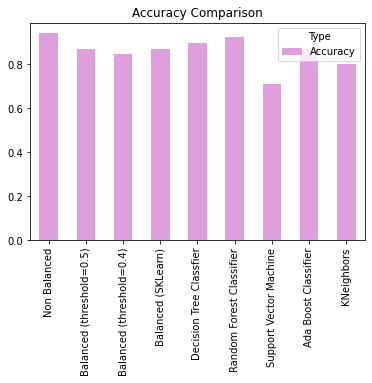

MCC


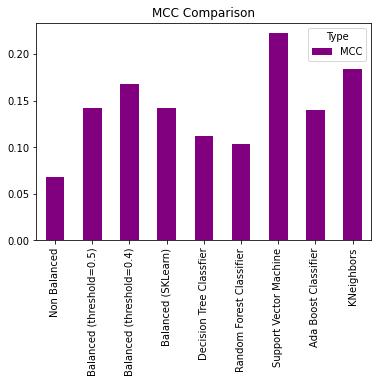

Precision


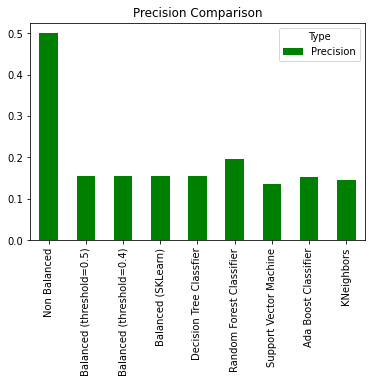

Recall


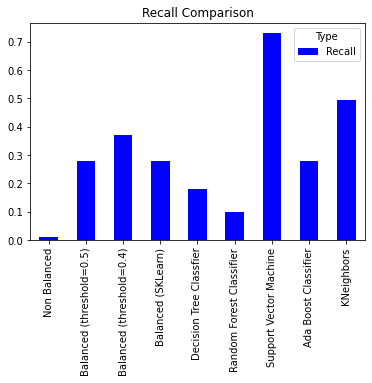

Specificity


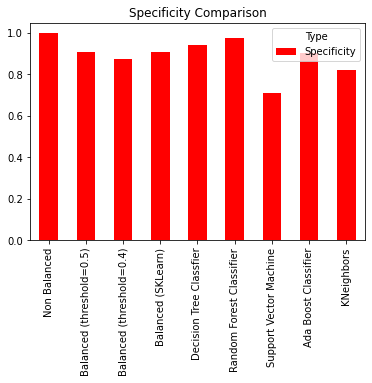

F1-Score


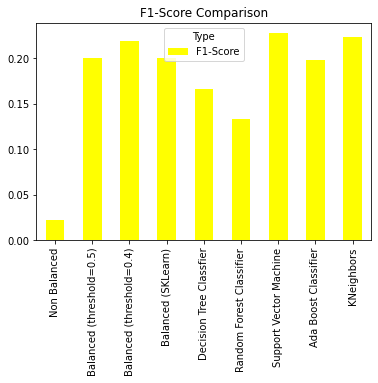

AUROC


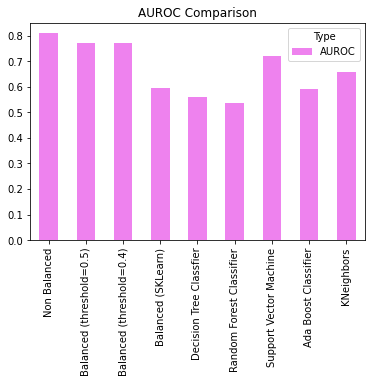

In [ ]:
metrics = ['Accuracy','MCC', 'Precision','Recall','Specificity', 'F1-Score', 'AUROC']
colors = ['plum', 'purple', 'green', 'blue', 'red', 'yellow', 'violet']

i=0
for metric in metrics:
    print (metric)
    analysisPlots(metric, colors[i], metric + " Comparison", "images\\"+metric+".jpg")
    i += 1
    